In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def Izhikevich(t_list, I_list, param):
    a, b, c, d = param[0], param[1], param[2], param[3]
    dt = t_list[1] - t_list[0]
    
    # v = -70 #mV
    v = (b - 5 - np.sqrt((5-b)**2 - 0.16 * 140))/0.08
    u = b * v # fixed point for IVP
    v_list = []
    u_list = []
    spike_list = []
    
    for i in range(len(t_list)):
        
        dvdt = 0.04 * v**2 + 5*v + 140 - u +I_list[i]
        dudt = a * (b*v-u)
        
        v_next = v + dvdt * dt
        u_next = u + dudt * dt
        
        if v_next >= 30:
            v = c
            u = u_next + d
            spike_list.append(1)
        else:
            v = v_next
            u = u_next
            spike_list.append(0)
        
        v_list.append(v)
        u_list.append(u)
        
    return v_list, u_list, spike_list
            

In [7]:
print('for integrator')
param_I = [0.02, -0.1, -55, 6]
b = param_I[1]
print((b - 5 - np.sqrt((5-b)**2 - 0.16 * 140))/0.08, b* (b - 5 - np.sqrt((5-b)**2 - 0.16 * 140))/0.08)
print((b - 5 + np.sqrt((5-b)**2 - 0.16 * 140))/0.08, b* (b - 5 + np.sqrt((5-b)**2 - 0.16 * 140))/0.08)

print('for resonator')
param_R = [0.1, 0.26, -60, -1]
b = param_R[1]
print((b - 5 - np.sqrt((5-b)**2 - 0.16 * 140))/0.08, b*(b - 5 - np.sqrt((5-b)**2 - 0.16 * 140))/0.08)
print((b - 5 + np.sqrt((5-b)**2 - 0.16 * 140))/0.08, b*(b - 5 + np.sqrt((5-b)**2 - 0.16 * 140))/0.08)

for integrator
-87.49999999999997 8.749999999999998
-40.00000000000001 4.000000000000001
for resonator
-62.49999999999998 -16.249999999999993
-56.00000000000003 -14.560000000000006


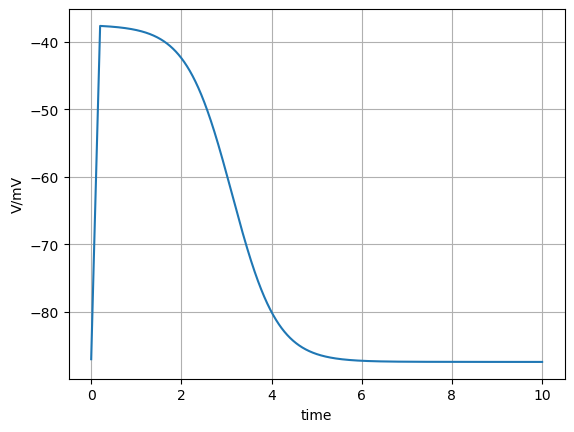

In [30]:
# for integrator
# dt = 0.01 idk
T = 0.2
T_span = 10
t_list = np.linspace(0, T_span, 5000)
I_0 =  266 #265.46546546546546
I_list = [I_0 if t <= T else 0 for t in t_list]
#print(np.where(np.array(I_list) == 0)[0])
v_list, u_list, spike_list = Izhikevich(t_list,I_list, param_I)

plt.grid(True)
plt.plot(t_list, v_list)
plt.ylabel('V/mV')
plt.xlabel('time')
plt.show()


In [21]:
T_span = 15
T = 0.2
t_list = np.linspace(0, T_span, 5000)

I_0_list = np.linspace(250, 280, 1000)

I_spike_list = []

for I_0 in I_0_list:
    I_list = [I_0 if t <= T else 0 for t in t_list]
    index_of_zero = np.where(np.array(I_list) == 0)[0][0]
    v_list, u_list, spike_list = Izhikevich(t_list,I_list, param_I)
    
    if max(v_list) > 0:
    #if v_list[index_of_zero] < v_list[index_of_zero+1]:
        I_spike_list.append(I_0)
print(min(I_spike_list))

265.46546546546546


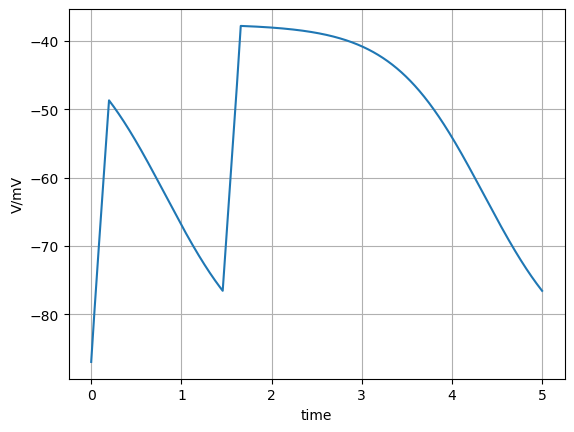

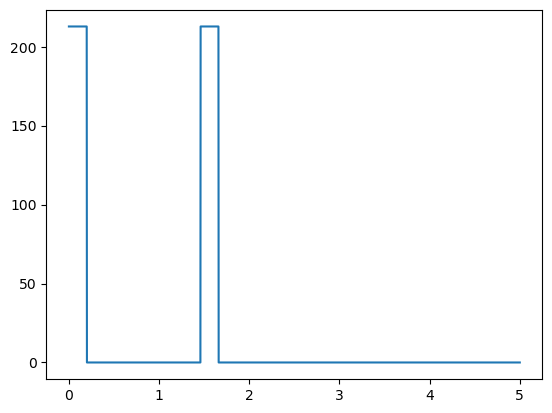

In [47]:
delta_T = 1.26 # roughly 1.2667334669338677


# dt = 0.01 idk
T1 = 0.2
T_span = 5
t_list = np.linspace(0, T_span, 2000)
I_th = 266 #175.37537537537537
I_list_double = [I_th * 0.8 if (t <= T1) or (T1 + delta_T <= t <= 2 * T1 + delta_T) else 0 for t in t_list]
#print(np.where(np.array(I_list) == 0)[0])
v_list, u_list, spike_list = Izhikevich(t_list,I_list_double, param_I)

plt.plot(t_list, v_list)
plt.ylabel('V/mV')
plt.xlabel('time')
plt.grid(True)
plt.show()
plt.plot(t_list, I_list_double)
plt.show()

In [41]:
T_span = 5
T1 = 0.2

I_th = 267 #266.6166166166166

t_list = np.linspace(0, T_span, 2000)
delta_T_list = np.linspace(0.9, 1.3, 1000)

T_spike_list = []

for delta_T in delta_T_list:
    I_list = [I_th * 0.8 if (t <= T1) or (T1 + delta_T <= t <= 2 * T1 + delta_T) else 0 for t in t_list]
    
    v_list, u_list, spike_list = Izhikevich(t_list,I_list, param_I)
    
    #if sum(spike_list) >0.9:
    if max(v_list) < 0: # if it fails to trigger a spike
        T_spike_list.append(delta_T)
        
print(min(T_spike_list))

1.2407407407407407


### Resonator param_R

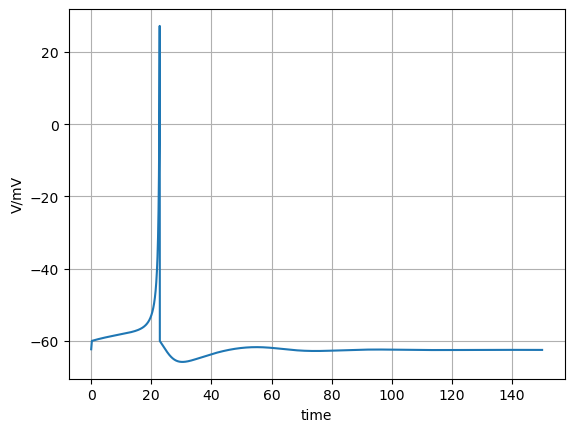

In [53]:
T = 0.2
T_span = 150
t_list = np.linspace(0, T_span, 10000)
I_0 =11.8
#I_0 = 11.73 * 0.98 #11.72972972972973
I_list = [I_0 if t <= T else 0 for t in t_list]
#print(np.where(np.array(I_list) == 0)[0])
v_list, u_list, spike_list = Izhikevich(t_list,I_list, param_R)

plt.grid(True)
plt.plot(t_list, v_list)
plt.ylabel('V/mV')
plt.xlabel('time')
plt.show()

In [251]:
T_span = 150
T = 0.2
t_list = np.linspace(0, T_span, 5000)

I_0_list = np.linspace(10, 12, 1000)

I_spike_list = []

for I_0 in I_0_list:
    I_list = [I_0 if t <= T else 0 for t in t_list]
    index_of_zero = np.where(np.array(I_list) == 0)[0][0]
    v_list, u_list, spike_list = Izhikevich(t_list,I_list, param_R)
    
    #if sum(spike_list) >0.9:
    if max(v_list) > 0:
        I_spike_list.append(I_0)
print(min(I_spike_list))

11.72972972972973


dt =0.015001500150015001 


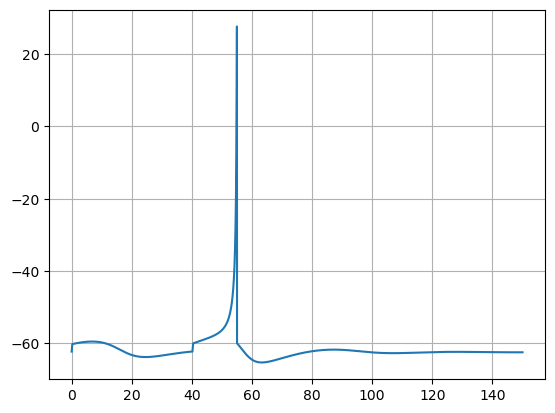

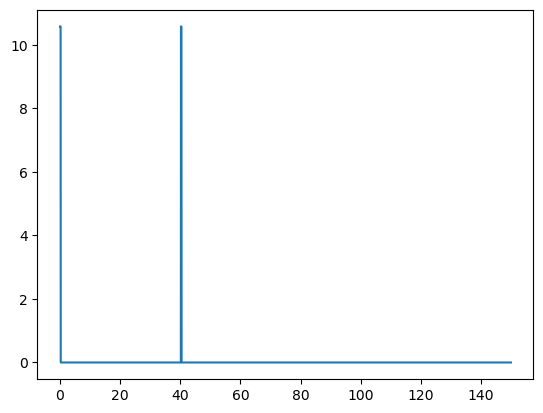

In [58]:
delta_T = 40


# dt = 0.01 idk
T1 = 0.2
T_span = 150
t_list = np.linspace(0, T_span, 10000)
print(f'dt ={t_list[1] - t_list[0]} ')
I_th = 11.75  #175.37537537537537
I_list_double = [I_th * 0.9 if (t <= T1) or (T1 + delta_T <= t <= 2 * T1 + delta_T) else 0 for t in t_list]
#print(np.where(np.array(I_list) == 0)[0])
v_list, u_list, spike_list = Izhikevich(t_list,I_list_double, param_R)

plt.plot(t_list, v_list)
plt.grid(True)
plt.show()
plt.plot(t_list, I_list_double)
plt.show()

In [265]:
T_span = 150
T1 = 0.2

I_th = 11.7

t_list = np.linspace(0, T_span, 20000)
delta_T_list = np.linspace(0, 110, 200)

T_spike_list = []

for delta_T in delta_T_list:
    I_list_2 = [I_th * 0.98 if (t <= T1) or (T1 + delta_T <= t <= 2 * T1 + delta_T) else 0 for t in t_list]
    #I_list_2 = [12.5 * 0.9 if (t <= T1) or (T1 + delta_T <= t <= 2 * T1 + delta_T) else 0 for t in t_list]
    
    v_list_wtf, u_list, spike_list = Izhikevich(t_list,I_list_2, param_R)
    
    #if sum(spike_list) >0.9:
    #print(f'{delta_T}, {max(v_list_wtf)}')
    if max(v_list_wtf) > 0: # if it at least trigger one spike
        T_spike_list.append(delta_T)

print(T_spike_list)

[0.0, 0.5527638190954773, 1.1055276381909547, 1.658291457286432, 2.2110552763819094, 2.7638190954773867, 3.316582914572864, 3.8693467336683414, 4.422110552763819, 4.974874371859296, 5.527638190954773, 6.080402010050251, 6.633165829145728, 7.185929648241205, 7.738693467336683, 8.29145728643216, 8.844221105527637, 9.396984924623116, 9.949748743718592, 10.502512562814069, 11.055276381909547, 11.608040201005025, 12.160804020100501, 12.713567839195978, 13.266331658291456, 13.819095477386934, 14.37185929648241, 36.482412060301506, 37.03517587939698, 37.58793969849246, 38.14070351758794, 38.69346733668341, 39.246231155778894, 39.79899497487437, 40.35175879396984, 40.904522613065325, 41.4572864321608, 42.010050251256274, 42.562814070351756, 43.11557788944723, 43.66834170854271, 44.22110552763819, 44.77386934673366, 45.32663316582914, 45.87939698492462, 46.4321608040201, 46.984924623115575, 47.53768844221105, 48.09045226130653, 48.643216080402006, 49.19597989949748, 49.74874371859296, 50.301507

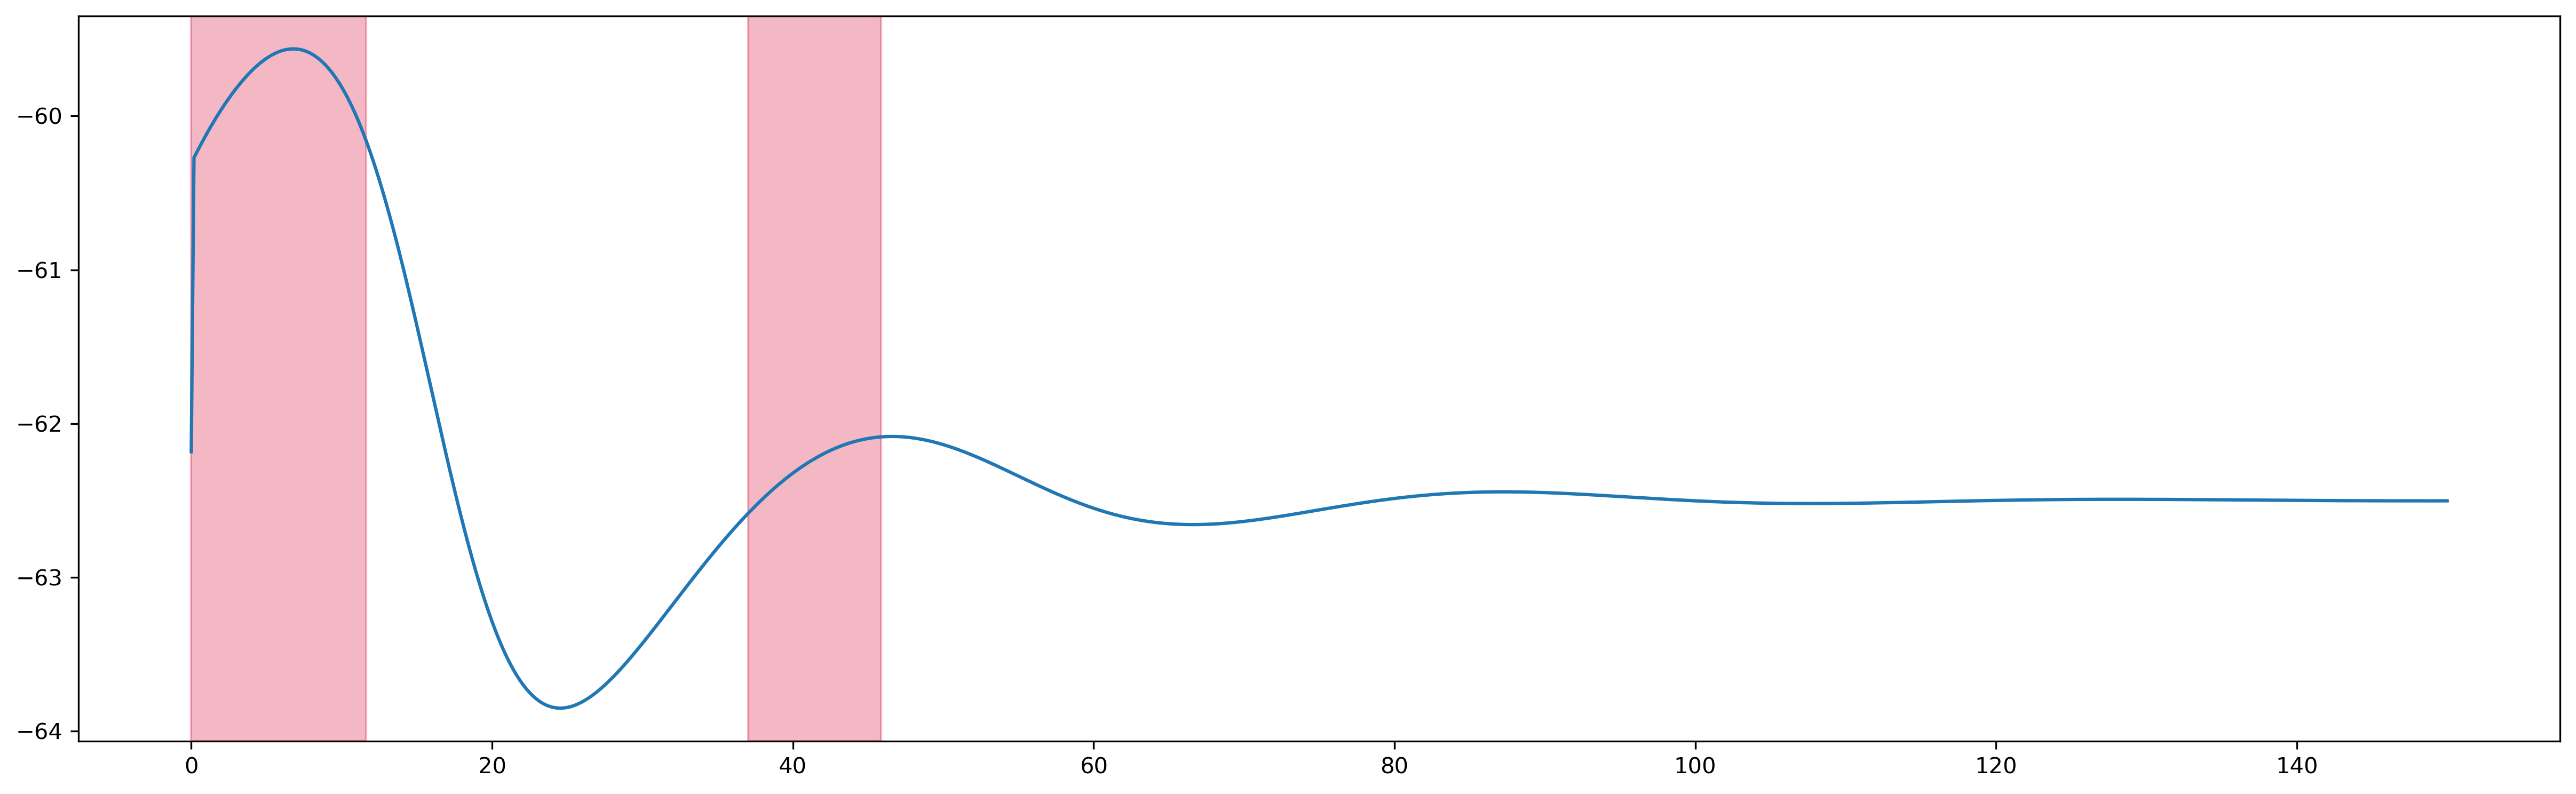

In [264]:
fig, ax = plt.subplots(1,1,figsize=(20,6), dpi = 300)

ax.plot(t_list, v_list)
ax.axvspan(0, 11.608, alpha=0.3, color='crimson', label='vis')
ax.axvspan(37.035, 45.8793, alpha=0.3, color='crimson', label='vis')

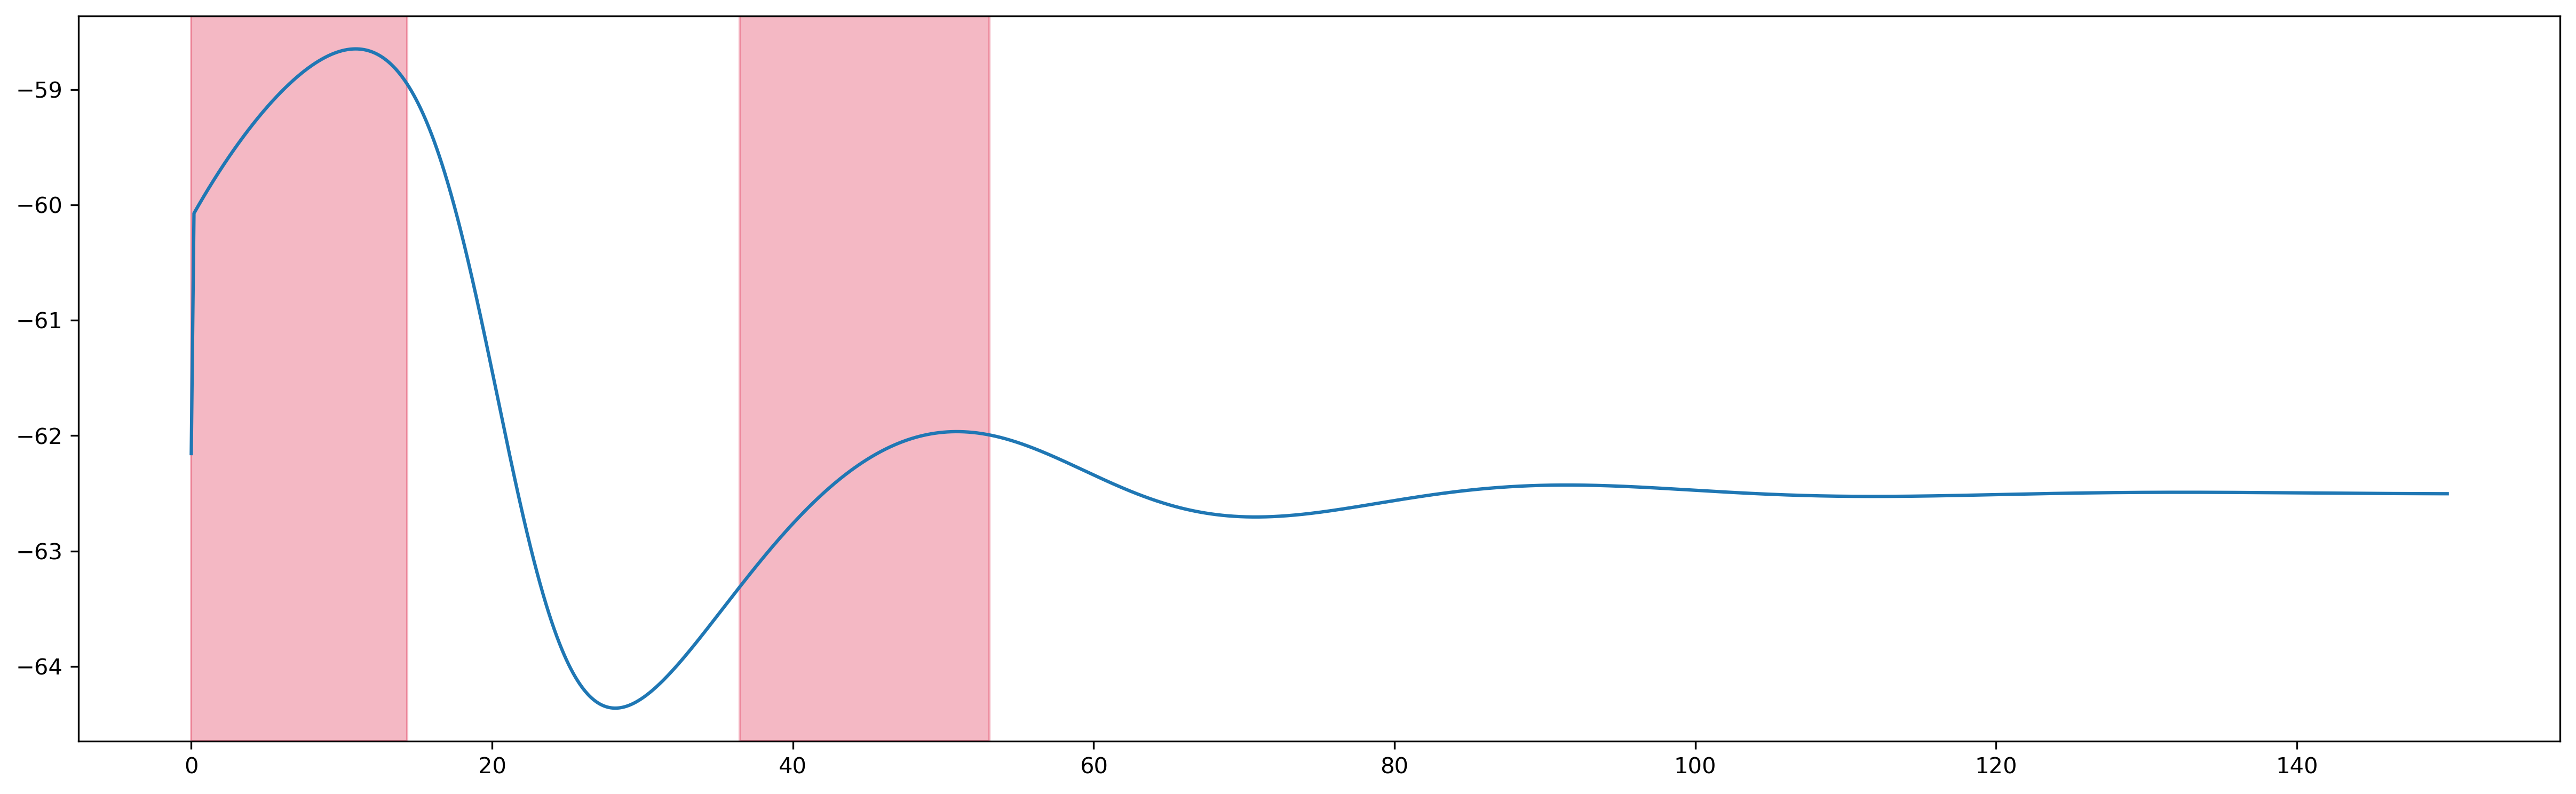

In [267]:
fig, ax = plt.subplots(1,1,figsize=(20,6), dpi = 300)

ax.plot(t_list, v_list)
ax.axvspan(0, 14.3718, alpha=0.3, color='crimson', label='vis')
ax.axvspan(36.48, 53.06, alpha=0.3, color='crimson', label='vis') # maybe three